In [ ]:
import tesserocr
# Download and extract this: https://github.com/tesseract-ocr/tessdata/archive/refs/tags/4.1.0.zip
# to: '../../ressources/tesserocr/tessdata-4.1.0'

from dataclasses import dataclass
from PIL import Image

import cv2
import numpy as np

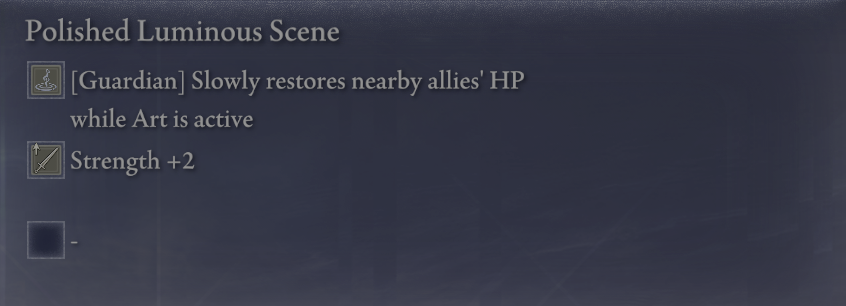

In [326]:
image = Image.open("relics/56.png")
image

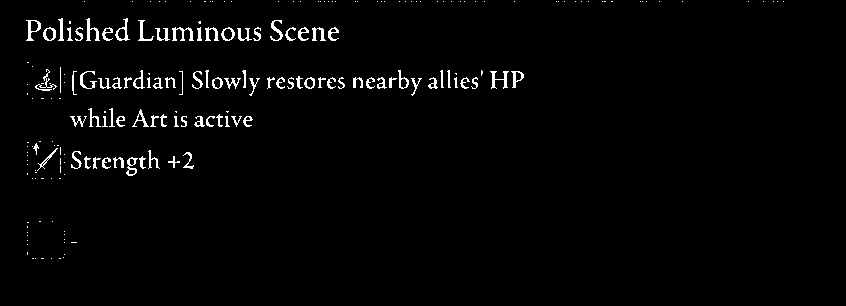

In [ ]:
# Processing the image a bit so that the OCR returns an empty string for all cases
# when nothing is there instead of hallucinating characters

image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 105, 255, cv2.THRESH_BINARY)
image = Image.fromarray(image)
image

In [328]:
@dataclass
class TextZone:
    left_rel: int
    top_rel: int
    w_rel: int
    h_rel: int
    im_w: int
    im_h: int

    def pil_crop(self):
        right_rel = self.left_rel + self.w_rel
        bottom_rel = self.top_rel + self.h_rel
        return (
            int(self.im_w * self.left_rel), int(self.im_h * self.top_rel),
            int(self.im_w * right_rel), int(self.im_h * bottom_rel)
        )

In [329]:
relic_name_rect = TextZone(
    0 / 846, 0 / 306,
    846 / 846, 60 / 306,
    image.width, image.height
)

first_effect_rect = TextZone(
    65 / 846, 61 / 306,
    781 / 846, 80 / 306,
    image.width, image.height
)

second_effect_rect = TextZone(
    65 / 846, 141 / 306,
    781 / 846, 80 / 306,
    image.width, image.height
)

third_effect_rect = TextZone(
    65 / 846, 221 / 306,
    781 / 846, 80 / 306,
    image.width, image.height
)

Polished Luminous Scene


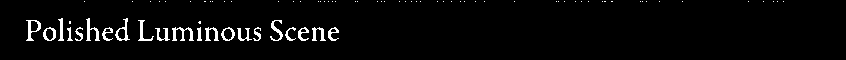

In [330]:
relic_name_im = image.crop(relic_name_rect.pil_crop())
print(tesserocr.image_to_text(relic_name_im, path='../../ressources/tesserocr/tessdata-4.1.0', psm=6).replace('\n', ' ').strip())
relic_name_im

[Guardian] Slowly restores nearby allies' HP while Art is active


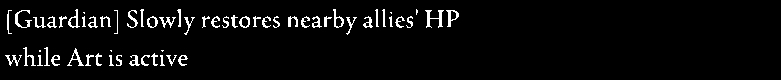

In [331]:
first_effect_im = image.crop(first_effect_rect.pil_crop())
print(tesserocr.image_to_text(first_effect_im, path='../../ressources/tesserocr/tessdata-4.1.0', psm=6).replace('\n', ' ').strip())
first_effect_im

Strength +2


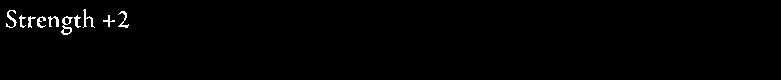

In [332]:
second_effect_im = image.crop(second_effect_rect.pil_crop())
print(tesserocr.image_to_text(second_effect_im, path='../../ressources/tesserocr/tessdata-4.1.0', psm=6).replace('\n', ' ').strip())
second_effect_im

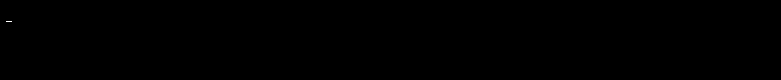

In [333]:
third_effect_im = image.crop(third_effect_rect.pil_crop())
print(tesserocr.image_to_text(third_effect_im, path='../../ressources/tesserocr/tessdata-4.1.0', psm=6).replace('\n', ' ').strip())
third_effect_im